<a href="https://colab.research.google.com/github/nehal3589/heart/blob/main/Data_Anlayst(task_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

In [ ]:
heart = pd.read_csv('/content/heart.csv')
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
heart.shape

(1025, 14)

In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Accuracy: 0.855457227138643
F1 Score: 0.856033653781039


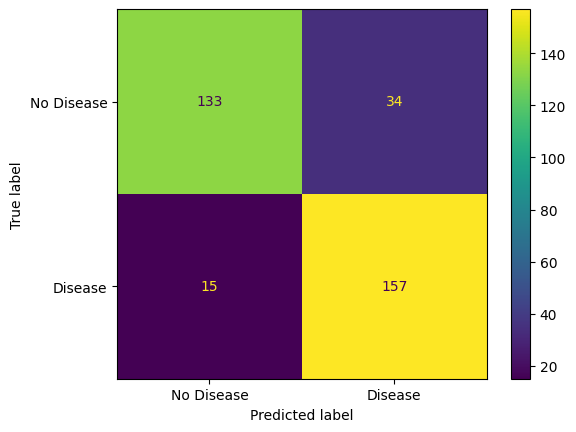

In [ ]:
# Naive Bayes(جاوسن)
X = heart.drop('target', axis=1)
y = heart['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

labels = ["No Disease", "Disease"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()


In [ ]:
#loigistic regression
import numpy as np
from sklearn import linear_model
X = heart.drop('target', axis=1)
y = heart['target']

X_age = np.array(heart['age']).reshape(-1,1)

logr = linear_model.LogisticRegression(max_iter=1000)
logr.fit(X_age, y)

predicted = logr.predict(np.array([46]).reshape(-1, 1))
print("predicted:", predicted)
def logit2prob(logr, X):
    log_odds = logr.coef_ * X + logr.intercept_
    odds = np.exp(log_odds)
    probability = odds / (1 + odds)
    return probability

print(logit2prob(logr, X_age))


predicted: [1]
[[0.54656748]
 [0.53340285]
 [0.31708524]
 ...
 [0.61107051]
 [0.57268454]
 [0.52019154]]


LDA Accuracy: 0.8417721518987342
LDA Confusion Matrix:
 [[122  34]
 [ 16 144]]
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       156
           1       0.81      0.90      0.85       160

    accuracy                           0.84       316
   macro avg       0.85      0.84      0.84       316
weighted avg       0.85      0.84      0.84       316



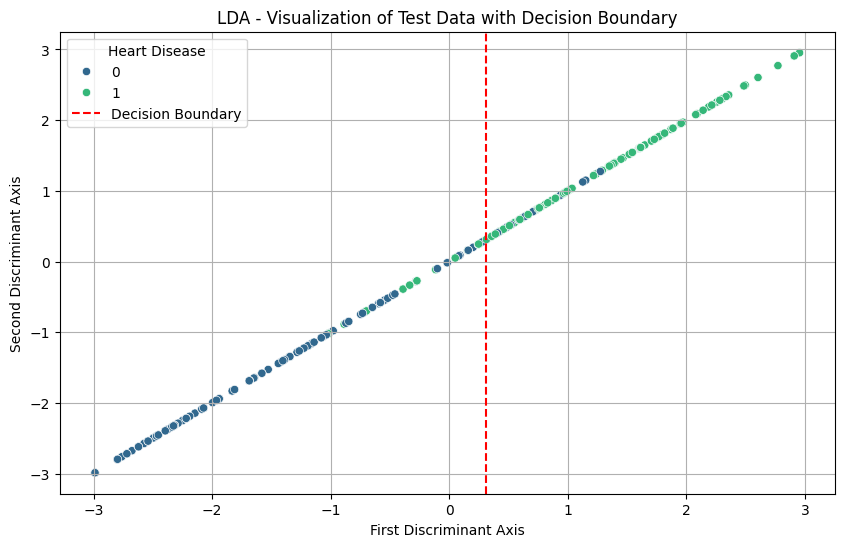

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np

# Load the dataset
df = pd.read_csv('heart.csv')

# Define features and target
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = 'target'

X = df[features]
y = df[target]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balancing the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize and train the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Make predictions and evaluate the LDA model
y_pred_lda = lda.predict(X_test)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))
print("LDA Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print("LDA Classification Report:\n", classification_report(y_test, y_pred_lda))

# Transform the test data into the LDA space
X_lda = lda.transform(X_test)

# Create a DataFrame for the transformed data
lda_df = pd.DataFrame(X_lda, columns=['LDA1'])
lda_df[target] = y_test.values

# Plot the LDA results with decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LDA1', y='LDA1', hue=target, data=lda_df, palette='viridis', marker='o')

# Adding decision boundary line
x_values = np.linspace(lda_df['LDA1'].min() - 1, lda_df['LDA1'].max() + 1, 100)
decision_boundary = np.median(lda_df['LDA1'])  # A simple decision boundary for demonstration
plt.axvline(x=decision_boundary, color='red', linestyle='--', label='Decision Boundary')

plt.title('LDA - Visualization of Test Data with Decision Boundary')
plt.xlabel('First Discriminant Axis')
plt.ylabel('Second Discriminant Axis')
plt.legend(title='Heart Disease')
plt.grid(True)
plt.show()


QDA Accuracy: 0.8214285714285714
QDA Confusion Matrix:
 [[123  36]
 [ 19 130]]
QDA Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82       159
           1       0.78      0.87      0.83       149

    accuracy                           0.82       308
   macro avg       0.82      0.82      0.82       308
weighted avg       0.83      0.82      0.82       308



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


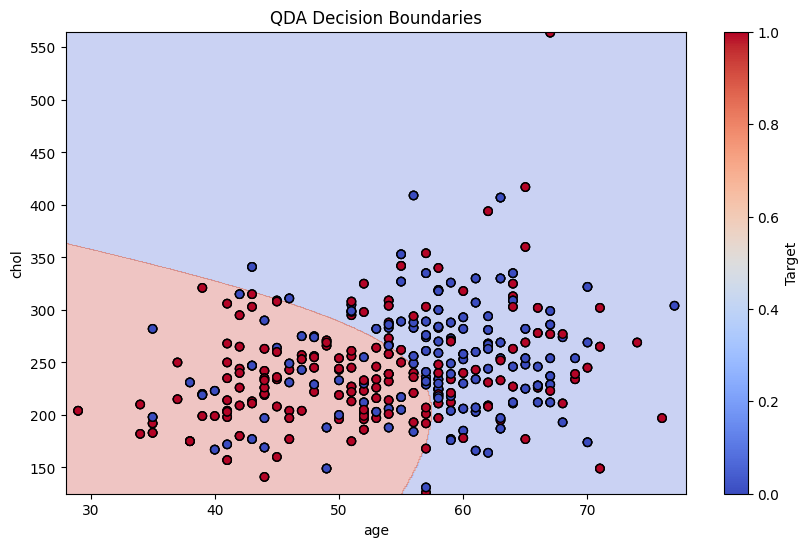

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('heart.csv')

# Define features and target
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = 'target'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Make predictions with QDA
y_pred_qda = qda.predict(X_test)

# Evaluate the QDA model
print("QDA Accuracy:", accuracy_score(y_test, y_pred_qda))
print("QDA Confusion Matrix:\n", confusion_matrix(y_test, y_pred_qda))
print("QDA Classification Report:\n", classification_report(y_test, y_pred_qda))

# For visualization, use a subset of features for plotting
subset_features = ['age', 'chol']
X_subset = X[subset_features]
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y, test_size=0.3, random_state=42)

# Fit QDA on the subset features
qda_subset = QuadraticDiscriminantAnalysis()
qda_subset.fit(X_train_subset, y_train_subset)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_subset[subset_features[0]].min() - 1, X_subset[subset_features[0]].max() + 1
y_min, y_max = X_subset[subset_features[1]].min() - 1, X_subset[subset_features[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = qda_subset.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundaries and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_subset[subset_features[0]], X_subset[subset_features[1]], c=y, edgecolor='k', cmap='coolwarm')
plt.title('QDA Decision Boundaries')
plt.xlabel(subset_features[0])
plt.ylabel(subset_features[1])
plt.colorbar(label='Target')
plt.show()

